# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [4]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [5]:
import numpy as np
import scipy.stats as sps
import torch
from torch import nn

---
## Задача 1

Напишите  нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. 

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$ (например из лекции).

In [49]:
sample_size = int(1e5)
X = sps.norm.rvs(size=(sample_size, ))
y = X**2

assert y.shape == (sample_size,)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию и случайный лес. 

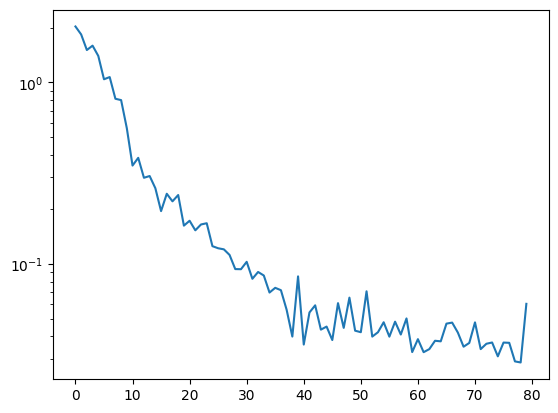

In [51]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.utils.data import TensorDataset, DataLoader


model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,1),)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-1)

X_train_torch, y_train_torch = torch.tensor(X_train,dtype=torch.float32).view(-1,1), torch.tensor(y_train,dtype=torch.float32).view(-1,1)
losses = []

train_dataset = TensorDataset(X_train_torch, y_train_torch) # create your datset
train_dataloader = DataLoader(train_dataset, batch_size = 2000) # create your dataloader

for epoch in range(2):
    for iter, batch in enumerate(train_dataloader): 
        features,target = batch
        optimizer.zero_grad()
        pred = model(features)
        loss = criterion(pred,target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (iter +1) % 10 == 0:
            clear_output(True)
            plt.plot(losses)
            plt.yscale('log')
            plt.show()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

MSE Нейронная сеть: 0.0351608736417775
MSE Linear regression: 2.044298066105059
MSE Random Forest: 0.188476769805547


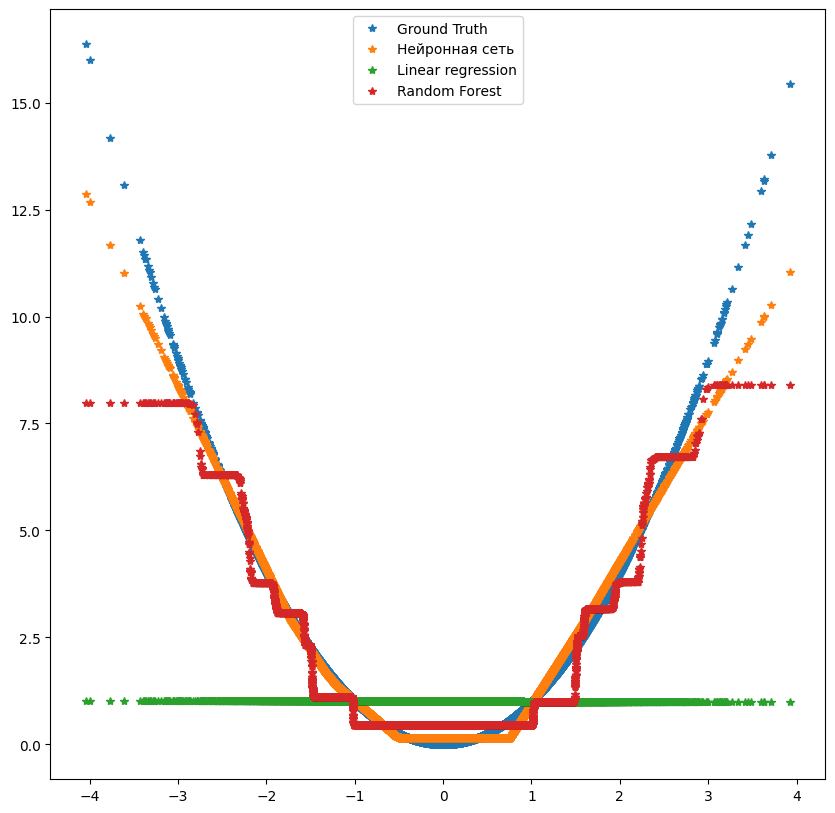

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model.eval()
nn_test_prediction = model(torch.tensor(X_test,dtype=torch.float32).view(-1,1)).detach().numpy()


lr_model = LinearRegression()
lr_model.fit(X_train.reshape(-1,1),y_train)
lr_test_prediction = lr_model.predict(X_test.reshape(-1,1))

rf_model = RandomForestRegressor(max_depth=3)

rf_model.fit(X_train.reshape(-1, 1),y_train)
rf_test_prediction = rf_model.predict(X_test.reshape(-1,1))


for name,prediction in zip(['Нейронная сеть','Linear regression','Random Forest'],[nn_test_prediction,lr_test_prediction,rf_test_prediction]):
    print(f'MSE {name}:', mean_squared_error(y_test,prediction))


plt.figure(figsize=(10,10))
plt.plot(X_test,y_test,'*',label = 'Ground Truth')
plt.plot(X_test,nn_test_prediction,'*',label='Нейронная сеть')
plt.plot(X_test,lr_test_prediction,'*',label='Linear regression')
plt.plot(X_test,rf_test_prediction,'*',label='Random Forest')
plt.legend()
plt.show()

Повторите вычисления для нелинейной функции, зависящей от двух параметров $f(x, y)$.

In [93]:
x, y= np.random.normal(0, 10, 100000),np.random.normal(0, 10, 100000)

X = np.stack([x, y]).T
result= x**2 + y**2
X_train, X_test, y_train, y_test = train_test_split(X,result,test_size=0.2)

In [94]:
X_train[0,0],X_train[0,1],y_train[0]-X_train[0,0]**2-X_train[0,1]**2

(-0.7158560139466608, 10.45734485223977, 0.0)

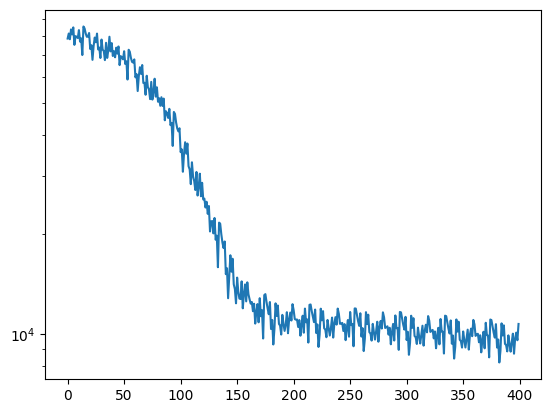

In [95]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.utils.data import TensorDataset, DataLoader


model = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,1),)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-2)

X_train_torch, y_train_torch = torch.tensor(X_train,dtype=torch.float32).view(-1,2), torch.tensor(y_train,dtype=torch.float32).view(-1,1)
losses = []

train_dataset = TensorDataset(X_train_torch, y_train_torch) # create your datset
train_dataloader = DataLoader(train_dataset, batch_size = 2000) # create your dataloader

for epoch in range(10):
    for iter, batch in enumerate(train_dataloader): 
        features,target = batch
        optimizer.zero_grad()
        pred = model(features)
        loss = criterion(pred,target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if (iter +1) % 10 == 0:
            clear_output(True)
            plt.plot(losses)
            plt.yscale('log')
            plt.show()

In [97]:
model.eval()
nn_test_prediction = model(torch.tensor(X_test,dtype=torch.float32).view(-1,2)).detach().numpy()


lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_test_prediction = lr_model.predict(X_test)

rf_model = RandomForestRegressor(max_depth=3)

rf_model.fit(X_train,y_train)
rf_test_prediction = rf_model.predict(X_test)

for name,prediction in zip(['Нейронная сеть','Linear regression','Random Forest'],[nn_test_prediction,lr_test_prediction,rf_test_prediction]):
    print(f'MSE {name}:', mean_squared_error(y_test,prediction))


MSE Нейронная сеть: 9422.755966535176
MSE Linear regression: 39111.47174859938
MSE Random Forest: 14060.402095682406


In [81]:
X_test.shape

(20000, 2)

**Вывод:** 
Нейронные сети превосходят прочие алгоритмы при работе с гладкими нелинейными функциями

---
## Задача 2

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

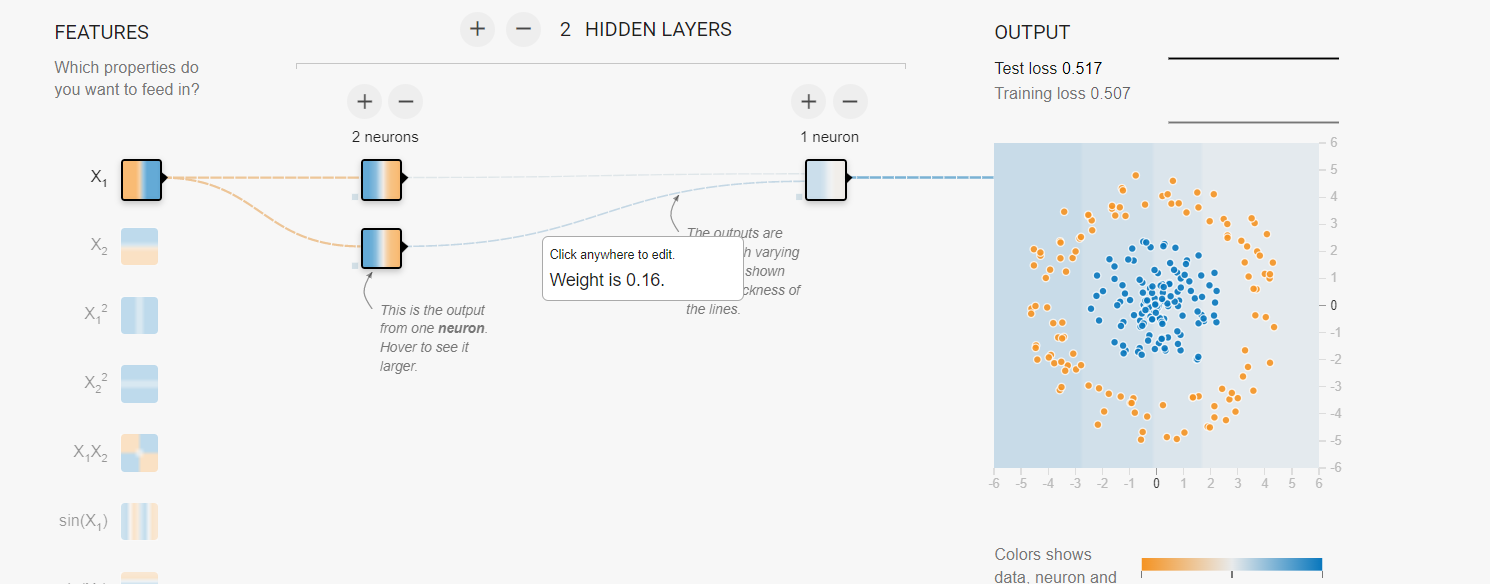

2 параметра на входном слое

2 параметра на скрытом

Итого:
4 параметра

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{2}{n} (Y_i -\widehat{y}(X_i))$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h} $$



Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \sigma(x) * (1 - \sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} =  \sigma(w_{1h}x + b_{1h}) * (1 - \sigma(w_{1h}x + b_{1h})) * x$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} =  \sigma(w_{1h}x + b_{1h}) * (1 - \sigma(w_{1h}x + b_{1h})) $$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Заменяем на минибатч. Тогда сэмплируем $m$ индексов $k_1,..,k_m \in (1,2,..,n)$:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} \approx \sum_{i=1}^m \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_{k_i})} \frac{\partial \widehat{y}(X_{k_i})}{\partial w_{2h}}$$

**Вывод:** Backprogation - мощный метод оптимизации весов нейронный сети. Требует гладкости и быстрого расчёта оптимизируемой функции.
Оптимизируемая бизнес-метрика может не удовлетворять поставленным условиям. Например ROC AUC. В этих случаях для использования backprogation можно применять PPO (Proximal Policy Optimization), вводящий отдельную нейросеть гладко связывающую бизнес метрику и её предсказание